<div class="cool-line"></div>

<style>
  .cool-line {
    width: 98%;
    height: 5px;
    background: linear-gradient(90deg, #ff0000, #ff7300, #ffeb00, #47ff00, #00ffe5, #2b65ff, #8000ff, #ff0080, #ff0000);
    background-size: 300% 100%;
    animation: gradientMove 30s infinite linear;
    border-radius: 10px;
  }

  @keyframes gradientMove {
    0% { background-position: 0% 50%; }
    100% { background-position: 300% 50%; }
  }
</style>


<h3><strong>Environment Setup</strong></h3>

In [ ]:
%pip install -r requirements.txt

In [165]:
import pandas as pd
import psycopg2
import dotenv
import os

dotenv.load_dotenv()

PG_PASSWORD = os.getenv("PG_PASSWORD")
PG_USER = os.getenv("PG_USER")
PG_HOST = os.getenv("PG_HOST")
PG_PORT = os.getenv("PG_PORT")
PG_DATABASE = os.getenv("PG_DB")

# Database connection parameters
import psycopg2
import os

conn = psycopg2.connect(
    host=PG_HOST,
    database=PG_DATABASE,
    user=PG_USER,
    password=PG_PASSWORD,
    port=PG_PORT,
    sslmode="require",
)


<img src="DB_SCHEMA.png" width="90%" style="margin-left: 5%;">

<h4><strong>Get all matches</strong></h4>

In [ ]:

query = """SELECT match_id FROM Matches;"""

matches_df = pd.read_sql_query(query, conn)

#display only first 5
matches_df.head()

R:\Temp\ipykernel_19248\2364306236.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  matches_df = pd.read_sql_query(query, conn)


,match_id
0,5oc8drrbruovbuiriyhdyiyok
1,5r7lyj3frtml3aqy458jrxj4k
2,5ptnar4qtaltvcfsjdw9vzhg4
3,5qqz2do47zjms7rfrwzcths7o
4,5pcyhm34h5c948yji4oryevpw


<h3><strong>Get one match data</strong></h3>

In [ ]:
game_id = matches_df.iloc[0, 0]

query_ball = "SELECT * FROM player_tracking pt WHERE game_id = '" + game_id + "' AND pt.player_id = 'ball' "

ball_df = pd.read_sql_query(query_ball, conn)

ball_df_sorted = ball_df.sort_values(by="frame_id", ascending=True)
ball_df_sorted.head()


,id,game_id,frame_id,timestamp,period_id,player_id,x,y
5882,135286,5oc8drrbruovbuiriyhdyiyok,1722033359880,00:50:59.880000,2,ball,41.413115,60.802182
5883,135309,5oc8drrbruovbuiriyhdyiyok,1722033360880,00:51:00.880000,2,ball,50.118033,71.649455
5884,135332,5oc8drrbruovbuiriyhdyiyok,1722033361880,00:51:01.880000,2,ball,51.239344,74.518273
5885,135355,5oc8drrbruovbuiriyhdyiyok,1722033362880,00:51:02.880000,2,ball,50.521311,74.118636
5886,135378,5oc8drrbruovbuiriyhdyiyok,1722033363880,00:51:03.880000,2,ball,46.960656,68.309636


In [ ]:
import math

def calculatePlayerSpeed(originalPosition, finalPosition, time_s):
    fieldHeight = 68  
    fieldWidth = 105

    originalPosition_x_m = originalPosition[0] * fieldWidth / 100
    originalPosition_y_m = originalPosition[1] * fieldHeight / 100

    finalPosition_x_m = finalPosition[0] * fieldWidth / 100
    finalPosition_y_m = finalPosition[1] * fieldHeight / 100

    distance_m = math.dist([originalPosition_x_m, originalPosition_y_m], [finalPosition_x_m, finalPosition_y_m])
    distance_km = distance_m / 1000
    time_h = time_s / 3600

    speed = distance_km / time_h
    return speed

18.684000000000015


In [111]:
import matplotlib.pyplot as plt
import numpy as np

def SpiderChart_2T(ChartTitle, TeamNames, labels, t1Values, t2Values, value_range):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    t1Values = t1Values + t1Values[:1]
    t2Values = t2Values + t2Values[:1]
    angles = angles + angles[:1]

    team1_color = "#4C4CBF"
    team2_color = "#BF4C4C"

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), facecolor='none')
    ax.set_facecolor('none')

    ax.plot(angles, t1Values, color=team1_color, linewidth=2, label=TeamNames[0])
    ax.fill(angles, t1Values, color=team1_color, alpha=0.25)

    ax.plot(angles, t2Values, color=team2_color, linewidth=2, label=TeamNames[1])
    ax.fill(angles, t2Values, color=team2_color, alpha=0.25)

    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    for label in ax.get_xticklabels():
        label.set_color("white")
    for label in ax.get_yticklabels():
        label.set_color("white")
        
    ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.7)
    for spine in ax.spines.values():
        spine.set_color('white')
    
    ax.set_ylim(value_range[0], value_range[1])
    ax.set_title(ChartTitle, y=1.08, color='white')

    leg = ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), frameon=False)
    for text in leg.get_texts():
        text.set_color("white")

    plt.show()

def SpiderChart_1T(ChartTitle, TeamName, labels, t1Values, value_range, teamColor):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    t1Values = t1Values + t1Values[:1]
    angles = angles + angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), facecolor='none')
    ax.set_facecolor('none')

    ax.plot(angles, t1Values, color=teamColor, linewidth=2, label=TeamName)
    ax.fill(angles, t1Values, color=teamColor, alpha=0.25)

    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    for label in ax.get_xticklabels():
        label.set_color("white")
    for label in ax.get_yticklabels():
        label.set_color("white")
        
    ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.7)
    for spine in ax.spines.values():
        spine.set_color('white')
    
    ax.set_ylim(value_range[0], value_range[1])
    ax.set_title(ChartTitle, y=1.08, color='white')

    leg = ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), frameon=False)
    for text in leg.get_texts():
        text.set_color("white")

    plt.show()


In [ ]:
labels = ["Short Passes %", "Medium Passes %", "Long Passes %", "Pass success rate %", "Time to first Pass (s)"]
t1Values = [10, 70, 20, 58, 20]
t2Values = [30, 20, 50, 53, 3]
SpiderChart_2T("Passes comparison", ["Belgium", "France"], labels, t1Values, t2Values, [0, 100])
SpiderChart_1T("Passes", "Belgium", labels, t1Values, [0, 100], "#4CEF4C")

In [168]:
def plot_tracking_data(tracking_data):
    # Define pitch dimensions and colors
    pitch = Pitch(pitch_color='#1C4C1C', line_color='white', pitch_type='opta',
                  pitch_length=105, pitch_width=68)  # Adjust dimensions if necessary
    fig, ax = pitch.draw(figsize=(12, 8))
    
    # Extract timestamp and team names
    timestamp = tracking_data['timestamp'].iloc[0]
    team_names = tracking_data['team_id'].unique()
    colors = mpl.colors.TABLEAU_COLORS
    color_map = {team: color for team, color in zip(team_names, colors.values())}
    
    # Plot player positions
    for _, row in tracking_data.iterrows():
        x = row['x']
        y = row['y']
        player_name = row['player_name']
        team_name = row['team_id']
        jersey_no = row['jersey_number']
        
        # Plot the ball
        if row['player_name'] == 'Ball':
            pitch.scatter(x, y, s=90, color='#FFFF4C', ax=ax, label='Ball')
        else:
            # Plot players
            pitch.scatter(x, y, s=100, color=color_map[team_name], ax=ax, label=team_name)
        
        # Add player names (excluding the ball)
        if row['player_name'] != 'Ball':
            ax.text(x + 2, y + 2, f"{player_name} ({jersey_no})", fontsize=8)
    
    # Set title
    #ax.set_title(f'Player Positions at Event Timestamp: {timestamp}', fontsize=16)
    plt.tight_layout()
    plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

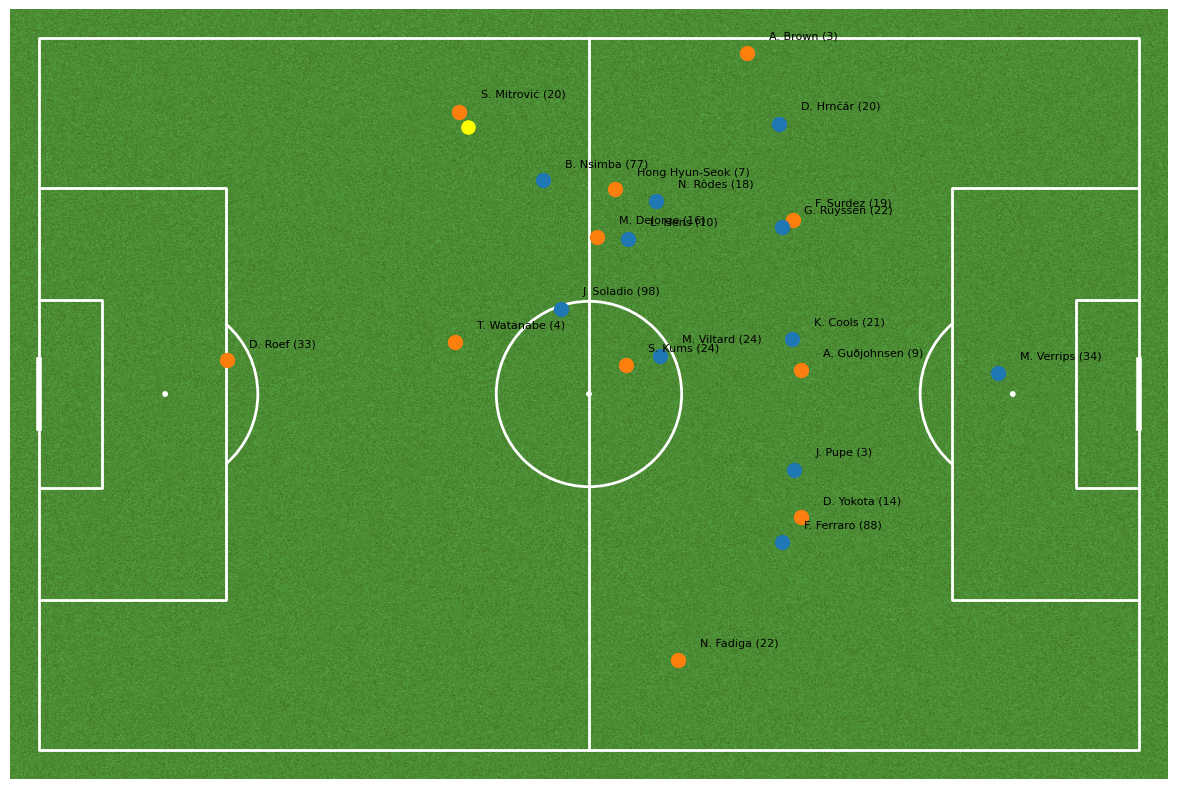

In [ ]:
query = """
SELECT pt.frame_id, pt.timestamp, pt.player_id, pt.x, pt.y, p.jersey_number, p.player_name, p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg';
"""
tracking_df = pd.read_sql_query(query, conn)
#tracking_df.head()

import matplotlib.pyplot as plt
from mplsoccer import Pitch
import matplotlib as mpl
from scipy.spatial import Voronoi, voronoi_plot_2d

def plot_tracking_data(tracking_data):
    # Define pitch dimensions and colors
    pitch = Pitch(pitch_color='grass', line_color='white', pitch_type='opta')
    fig, ax = pitch.draw(figsize=(13, 8))
    
    # Extract timestamp and team names
    timestamp = tracking_data['timestamp'].iloc[0]
    team_names = tracking_data['team_id'].unique()
    colors = mpl.colors.TABLEAU_COLORS
    color_map = {team: color for team, color in zip(team_names, colors.values())}
    
    points = []
    colors = []
    
    # Plot player positions
    for _, row in tracking_data.iterrows():
        x = row['x']
        y = row['y']
        player_name = row['player_name']
        team_name = row['team_id']
        jersey_no = row['jersey_number']
        
        # Plot the ball
        if player_name == 'Ball':
            pitch.scatter(x, y, s=90, color='yellow', ax=ax, label='Ball')
        else:
            # Plot players
            pitch.scatter(x, y, s=100, color=color_map[team_name], ax=ax, label=team_name)
            points.append([x, y])
            colors.append(color_map[team_name])
        
        # Add player names (excluding the ball)
        if player_name != 'Ball':
            ax.text(x + 2, y + 2, f"{player_name} ({jersey_no})", fontsize=8)


    

    team1, team2 = pitch.voronoi(points, colors)

    t1 = pitch.polygon(team1, ax=ax, fc='#c34c45', ec='white', lw=3, alpha=0.4)
    t2 = pitch.polygon(team2, ax=ax, fc='#6f63c5', ec='white', lw=3, alpha=0.4)
    
    # Set title
    #ax.set_title(f'Player Positions and Voronoi Diagram at Event Timestamp: {timestamp}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Example usage
frame_id1 = tracking_df['frame_id'].unique()[0]  
frame_id2 = tracking_df['frame_id'].unique()[1]  
# You can change this to any specific frame_id you want to visualize
filtered_tracking_df1 = tracking_df[tracking_df['frame_id'] == frame_id1]
#filtered_tracking_df2 = tracking_df[tracking_df['frame_id'] == frame_id2]
plot_tracking_data(filtered_tracking_df1)
#plot_tracking_data(filtered_tracking_df2)
